In [8]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 250 kB 5.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
import re
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np

In [19]:
student_count_df = pd.read_excel('student_count.xlsx', sheet_name='student_count')

In [34]:
population_df = pd.read_excel('student_count.xlsx', sheet_name='population')

In [20]:
student_count_df

,State/Board,2025 (Appeared/Latest Result),2024 (Appeared),2023 (Appeared),2022 (Appeared),2021 (Appeared/Registered)
0,Uttar Pradesh (UPMSP),"26,91,000","24,53,000","27,69,000",2410971,"26,10,000"
1,Maharashtra (MSBSHSE),"15,98,553","15,49,326","15,29,096","15,68,977","15,75,752"
2,Bihar (BSEB),"12,92,000","12,91,000","13,04,000","13,56,000","13,40,000"
3,Tamil Nadu (TNBSE),"7,92,000","7,61,000","8,00,000","8,06,000","8,18,000"
4,West Bengal (WBCHSE),"4,74,000","7,55,000","8,25,000","7,21,000","8,00,000"
5,Haryana (HBSE),"1,94,000","2,14,000","2,63,000","2,46,000","2,28,000"


In [21]:
population_df

,State,2021 (Estimated Pop. in Millions),2022 (Estimated Pop. in Millions),2023 (Estimated Pop. in Millions),2024 (Estimated Pop. in Millions),2025 (Estimated Pop. in Millions)
0,Uttar Pradesh,≈234.8 - 241.1,≈238.3,≈241.4 - 242.7,≈246.8 - 257.0,≈262.1
1,Maharashtra,≈124.7 - 125.7,≈125.7 - 126.3,≈126.7 - 127.4,≈127.9 - 128.8,≈128.6 - 129.6
2,Bihar,≈124.8 - 125.8,≈126.8 - 127.4,≈127.8 - 128.7,≈128.9 - 130.1,≈130.0 - 131.6
3,West Bengal,≈97.9 - 101.4,≈98.4 - 101.4,≈98.9 - 99.7,≈99.4 - 100.2,≈99.8 - 100.6
4,Tamil Nadu,≈76.3 - 82.1,≈76.5 - 83.1,≈76.8 - 83.9,≈77.0 - 84.7,≈77.2 - 85.3
5,Haryana,≈28.7 - 29.4,≈29.8,≈29.8 - 30.0,≈30.3,≈30.5 - 30.8


In [22]:
#Clean state names: remove brackets and text inside
student_count_df["State/Board"] = student_count_df["State/Board"].str.replace(r"\s*\(.*\)", "", regex=True)


#Rename "State/Board" to "state"
student_count_df.rename(columns={"State/Board": "state"}, inplace=True)

# Clean year columns: keep only 4-digit years
student_count_df.columns = [
    col.split()[0] if col[:4].isdigit() else col  # keep "2025" from "2025 (Appeared/Latest Result)"
    for col in student_count_df.columns
]

# Final cleaned dataframe
print(student_count_df)

           state       2025       2024       2023       2022       2021
0  Uttar Pradesh  26,91,000  24,53,000  27,69,000    2410971  26,10,000
1    Maharashtra  15,98,553  15,49,326  15,29,096  15,68,977  15,75,752
2          Bihar  12,92,000  12,91,000  13,04,000  13,56,000  13,40,000
3     Tamil Nadu   7,92,000   7,61,000   8,00,000   8,06,000   8,18,000
4    West Bengal   4,74,000   7,55,000   8,25,000   7,21,000   8,00,000
5        Haryana   1,94,000   2,14,000   2,63,000   2,46,000   2,28,000


In [23]:
# --- Remove commas and convert numbers to integers ---
for year in student_count_df.columns[1:]:  # skip "state"
    student_count_df[year] = (
        student_count_df[year]
        .astype(str)
        .str.replace(",", "", regex=False)  # remove commas
        .astype(int)
    )

# --- Convert to long format ---
student_count_long = student_count_df.melt(
    id_vars="state",
    var_name="year",
    value_name="appeared"
)

# Convert year to int for plotting
student_count_long["year"] = student_count_long["year"].astype(int)

print(student_count_long.head(10))

           state  year  appeared
0  Uttar Pradesh  2025   2691000
1    Maharashtra  2025   1598553
2          Bihar  2025   1292000
3     Tamil Nadu  2025    792000
4    West Bengal  2025    474000
5        Haryana  2025    194000
6  Uttar Pradesh  2024   2453000
7    Maharashtra  2024   1549326
8          Bihar  2024   1291000
9     Tamil Nadu  2024    761000


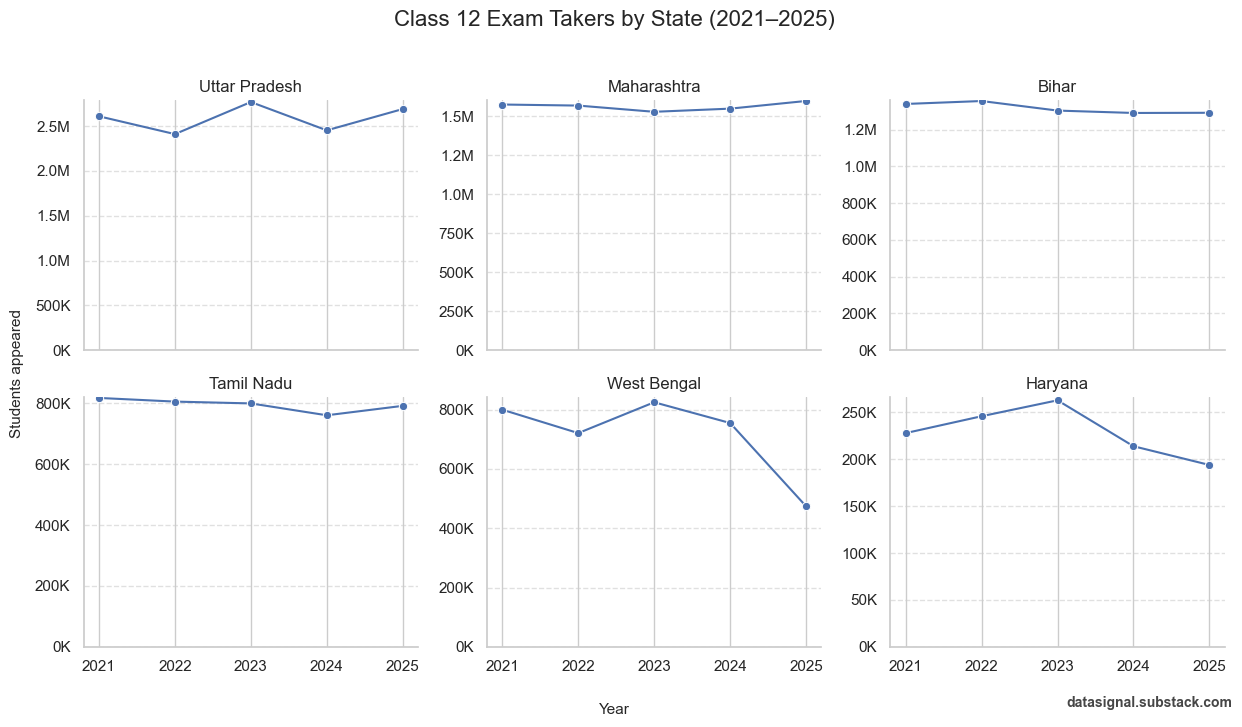

In [31]:
df = student_count_long.copy()

sns.set_theme(style="whitegrid")

g = sns.FacetGrid(
    df, col="state", col_wrap=3,
    height=3.5, aspect=1.2, sharey=False
)
g.map_dataframe(sns.lineplot, x="year", y="appeared", marker="o")

# --- formatter for K/M ---
def short_fmt(x, pos):
    if abs(x) >= 1_000_000:
        return f"{x/1_000_000:.1f}M"
    return f"{x/1_000:.0f}K"
fmt = FuncFormatter(short_fmt)

for ax in g.axes.flat:
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(0, ymax)
    ax.yaxis.set_major_formatter(fmt)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.grid(axis="y", linestyle="--", alpha=0.6)

# remove per-axes labels (keeps tick labels)
g.set_axis_labels("", "")

# titles only state names
g.set_titles("{col_name}")

# --- global labels and title ---
g.fig.suptitle("Class 12 Exam Takers by State (2021–2025)", y=1.02, fontsize=16)
g.fig.supxlabel("Year", fontsize=11)
g.fig.supylabel("Students appeared", fontsize=11)

# --- add newsletter attribution ---
g.fig.text(
    0.99, 0.02, "datasignal.substack.com",
    ha="right", va="bottom",
    fontsize=10, fontweight="bold", alpha=0.85
)

plt.tight_layout()
plt.savefig("students_by_state_facets.png", dpi=240, bbox_inches="tight")
# plt.show()


In [35]:
# 1. Rename first column
population_df.rename(columns={"State": "state"}, inplace=True)

# 2. Clean year columns → keep only the year
population_df.columns = [
    col.split()[0] if col[:4].isdigit() else col
    for col in population_df.columns
]

print(population_df.head())

           state            2021            2022            2023  \
0  Uttar Pradesh  ≈234.8 - 241.1          ≈238.3  ≈241.4 - 242.7   
1    Maharashtra  ≈124.7 - 125.7  ≈125.7 - 126.3  ≈126.7 - 127.4   
2          Bihar  ≈124.8 - 125.8  ≈126.8 - 127.4  ≈127.8 - 128.7   
3    West Bengal   ≈97.9 - 101.4   ≈98.4 - 101.4    ≈98.9 - 99.7   
4     Tamil Nadu    ≈76.3 - 82.1    ≈76.5 - 83.1    ≈76.8 - 83.9   

             2024            2025  
0  ≈246.8 - 257.0          ≈262.1  
1  ≈127.9 - 128.8  ≈128.6 - 129.6  
2  ≈128.9 - 130.1  ≈130.0 - 131.6  
3   ≈99.4 - 100.2   ≈99.8 - 100.6  
4    ≈77.0 - 84.7    ≈77.2 - 85.3  


In [ ]:
# 1) Long format
pop_long = population_df.melt(
    id_vars="state",
    var_name="year",
    value_name="raw"
)

# 2) Clean & split into low/high (values are in *millions*)
def split_low_high(val):
    if pd.isna(val):
        return pd.NA, pd.NA
    s = str(val)

    # remove approximation/tilde and commas; normalize spaces
    s = (s.replace("\xa0", " ")
           .replace("~", "")
           .replace("≈", "")
           .replace(",", "")
           .strip())

    # normalize all dash-like chars to a simple hyphen
    s = re.sub(r"[–—−\-]", "-", s)

    # extract numeric tokens
    nums = re.findall(r"\d+(?:\.\d+)?", s)

    if len(nums) >= 2:
        low, high = float(nums[0]), float(nums[1])
    elif len(nums) == 1:
        low = high = float(nums[0])
    else:
        return pd.NA, pd.NA

    return low, high

# apply
pop_long[["pop_low_m", "pop_high_m"]] = pop_long.apply(
    lambda r: pd.Series(split_low_high(r["raw"])),
    axis=1
)

# optional: midpoint
pop_long["pop_mid_m"] = pop_long[["pop_low_m", "pop_high_m"]].mean(axis=1)

# tidy types & finish
pop_long = (
    pop_long.drop(columns=["raw"])
            .assign(year=lambda d: d["year"].astype(int))
)

# nice rounding (optional)
pop_long[["pop_low_m","pop_high_m","pop_mid_m"]] = (
    pop_long[["pop_low_m","pop_high_m","pop_mid_m"]].round(2)
)

           state  year  pop_low_m  pop_high_m  pop_mid_m
0  Uttar Pradesh  2021      234.8       241.1     237.95
1    Maharashtra  2021      124.7       125.7     125.20
2          Bihar  2021      124.8       125.8     125.30
3    West Bengal  2021       97.9       101.4      99.65
4     Tamil Nadu  2021       76.3        82.1      79.20
5        Haryana  2021       28.7        29.4      29.05
6  Uttar Pradesh  2022      238.3       238.3     238.30
7    Maharashtra  2022      125.7       126.3     126.00
8          Bihar  2022      126.8       127.4     127.10
9    West Bengal  2022       98.4       101.4      99.90


In [42]:
# Prepare population with renamed midpoint column
pop_clean = pop_long.rename(columns={"pop_mid_m": "estimated_pop"})


student_pop_df = student_count_long.merge(
    pop_clean[["state", "year", "estimated_pop"]],
    on=["state", "year"], how="left"
)

student_pop_df["students_per_1k"] = (
    student_pop_df["appeared"] / (student_pop_df["estimated_pop"] * 1_000_000) * 1000
)

student_pop_df["students_pct"] = (
    student_pop_df["appeared"] / (student_pop_df["estimated_pop"] * 1_000_000) * 100
)

In [43]:
student_pop_df

,state,year,appeared,estimated_pop,students_per_1k,students_pct
0,Uttar Pradesh,2025,2691000,262.10,10.267074,1.026707
1,Maharashtra,2025,1598553,129.10,12.382285,1.238229
2,Bihar,2025,1292000,130.80,9.877676,0.987768
3,Tamil Nadu,2025,792000,81.25,9.747692,0.974769
4,West Bengal,2025,474000,100.20,4.730539,0.473054
5,Haryana,2025,194000,30.65,6.329527,0.632953
6,Uttar Pradesh,2024,2453000,251.90,9.737991,0.973799
7,Maharashtra,2024,1549326,128.35,12.071102,1.207110
8,Bihar,2024,1291000,129.50,9.969112,0.996911
9,Tamil Nadu,2024,761000,80.85,9.412492,0.941249


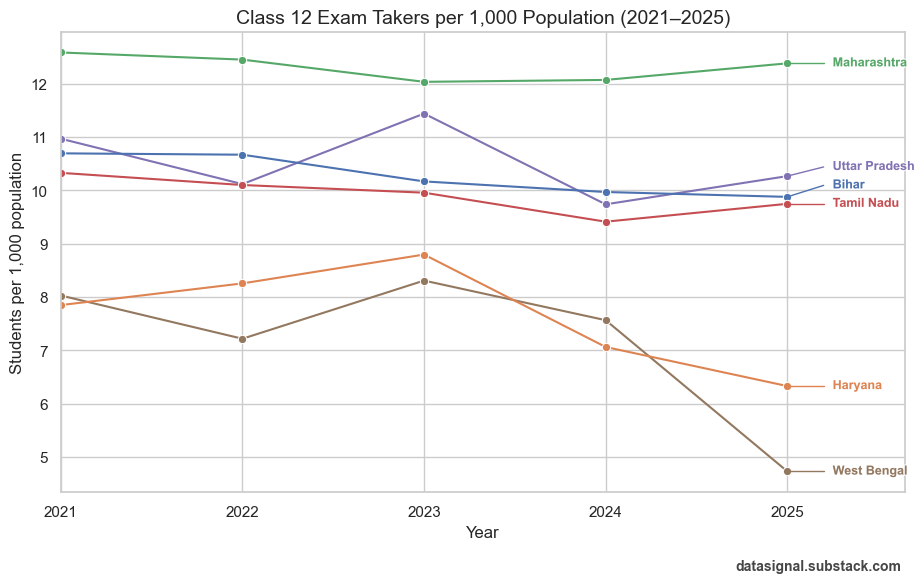

In [61]:
sns.set_theme(style="whitegrid")

# consistent colors you can reuse for text
states = sorted(student_pop_df["state"].unique())
palette = sns.color_palette(n_colors=len(states))
color_map = {s: c for s, c in zip(states, palette)}

fig, ax = plt.subplots(figsize=(9.5, 6))

sns.lineplot(
    data=student_pop_df,
    x="year", y="students_per_1k",
    hue="state", marker="o", legend=False, ax=ax,
    palette=color_map
)

# --- compute non-overlapping label positions at last year ---
last_year = student_pop_df["year"].max()
end = (
    student_pop_df[student_pop_df["year"] == last_year]
    .loc[:, ["state", "students_per_1k"]]
    .sort_values("students_per_1k")  # keep order
    .reset_index(drop=True)
)

ymin, ymax = ax.get_ylim()
gap = (ymax - ymin) * 0.04  # min vertical spacing between labels

# target y positions with spacing
y_targets = []
for i, y in enumerate(end["students_per_1k"].tolist()):
    if i == 0:
        y_targets.append(y)
    else:
        y_targets.append(max(y, y_targets[-1] + gap))

# clamp to axes limits
y_targets = np.clip(y_targets, ymin + gap, ymax - gap/2)

# --- draw label lines and text ---
x_label = last_year + 0.25
for (state, y), y_t in zip(end.itertuples(index=False), y_targets):
    c = color_map[state]
    # short connector from line-end to label
    ax.plot([last_year, x_label - 0.05], [y, y_t], color=c, linewidth=1)
    ax.text(
        x_label, y_t, state, color=c, va="center", fontsize=9, fontweight="bold",
        clip_on=False,
        path_effects=[pe.withStroke(linewidth=2, foreground="white", alpha=0.7)]
    )

# give labels breathing room on the right
xmin = student_pop_df["year"].min()
ax.set_xlim(xmin, last_year + 0.65)

ax.set_title("Class 12 Exam Takers per 1,000 Population (2021–2025)", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Students per 1,000 population")

# footer annotation
ax.text(
    0.995, -0.16, "datasignal.substack.com",
    transform=ax.transAxes, ha="right", va="center",
    fontsize=10, fontweight="bold", alpha=0.85
)

fig.tight_layout()
plt.savefig("12students_per100k.png", dpi=240, bbox_inches="tight")
#plt.show()


In [51]:
age_shares_2021 = pd.DataFrame({
    "state": ["Tamil Nadu", "West Bengal", "Maharashtra", "Haryana", "Uttar Pradesh", "Bihar"],
    "share_0_14": [0.20, 0.21, 0.22, 0.25, 0.30, 0.34]  # as fractions, not %
})


In [ ]:
pop2021 = pop_long[pop_long["year"] == 2021][["state", "pop_mid_m"]].rename(columns={"pop_mid_m": "pop_2021_m"})

In [54]:
youth_base = age_shares_2021.merge(pop2021, on="state", how="left")


youth_base

,state,share_0_14,pop_2021_m
0,Tamil Nadu,0.20,79.20
1,West Bengal,0.21,99.65
2,Maharashtra,0.22,125.20
3,Haryana,0.25,29.05
4,Uttar Pradesh,0.30,237.95
5,Bihar,0.34,125.30


In [55]:
# 0–14 population in 2021 (heads, not millions)
youth_base["pop_0_14_heads"] = youth_base["pop_2021_m"] * youth_base["share_0_14"] * 1_000_000


In [56]:
youth_base

,state,share_0_14,pop_2021_m,pop_0_14_heads
0,Tamil Nadu,0.20,79.20,15840000.0
1,West Bengal,0.21,99.65,20926500.0
2,Maharashtra,0.22,125.20,27544000.0
3,Haryana,0.25,29.05,7262500.0
4,Uttar Pradesh,0.30,237.95,71385000.0
5,Bihar,0.34,125.30,42602000.0


In [57]:
students_2025 = student_pop_df[student_pop_df["year"] == 2025][["state", "appeared"]]

comparison = youth_base.merge(students_2025, on="state", how="left")

comparison["students_per_1k_youth"] = (
    comparison["appeared"] / comparison["pop_0_14_heads"] * 1000
)

print(comparison[["state", "appeared", "pop_0_14_heads", "students_per_1k_youth"]])


           state  appeared  pop_0_14_heads  students_per_1k_youth
0     Tamil Nadu    792000      15840000.0              50.000000
1    West Bengal    474000      20926500.0              22.650706
2    Maharashtra   1598553      27544000.0              58.036342
3        Haryana    194000       7262500.0              26.712565
4  Uttar Pradesh   2691000      71385000.0              37.696995
5          Bihar   1292000      42602000.0              30.327215


In [59]:
# pretty table for viewing/export
table = (
    comparison
    .assign(
        pop_0_14_m=lambda d: d.pop_0_14_heads/1_000_000,
        students_per_1k_youth=lambda d: d.students_per_1k_youth.round(2)
    )[["state","appeared","pop_0_14_m","students_per_1k_youth"]]
    .rename(columns={
        "appeared":"Class 12 students (2025)",
        "pop_0_14_m":"0–14 population (2021, M)",
        "students_per_1k_youth":"Students per 1k of 0–14 base"
    })
    .sort_values("Students per 1k of 0–14 base", ascending=False)
)
print(table)

           state  Class 12 students (2025)  0–14 population (2021, M)  \
2    Maharashtra                   1598553                    27.5440   
0     Tamil Nadu                    792000                    15.8400   
4  Uttar Pradesh                   2691000                    71.3850   
5          Bihar                   1292000                    42.6020   
3        Haryana                    194000                     7.2625   
1    West Bengal                    474000                    20.9265   

   Students per 1k of 0–14 base  
2                         58.04  
0                         50.00  
4                         37.70  
5                         30.33  
3                         26.71  
1                         22.65  


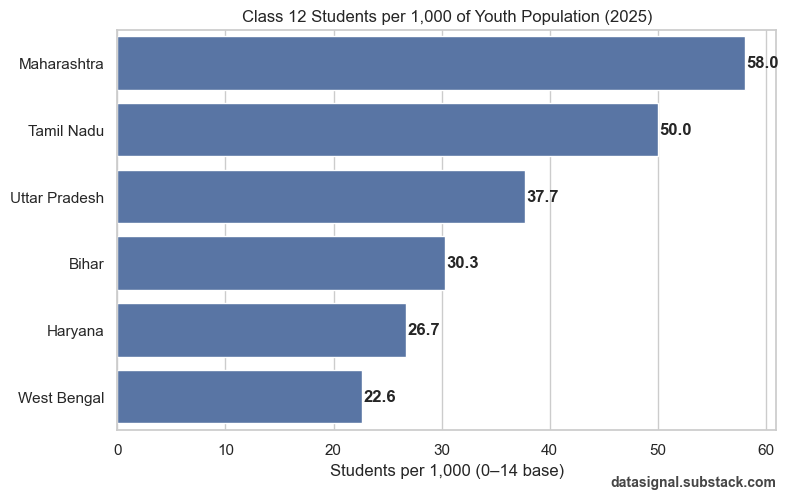

In [62]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8.5,5.2))

plot_df = table.rename(columns={"Students per 1k of 0–14 base":"per_1k"}).copy()
sns.barplot(data=plot_df, y="state", x="per_1k")

# value labels
for i, v in enumerate(plot_df["per_1k"]):
    plt.text(v + 0.15, i, f"{v:.1f}", va="center", fontweight="bold")

plt.title("Class 12 Students per 1,000 of Youth Population (2025)")
plt.xlabel("Students per 1,000 (0–14 base)")
plt.ylabel("")

# footer
plt.text(1.0, -0.13, "datasignal.substack.com", transform=plt.gca().transAxes,
         ha="right", va="center", fontsize=10, fontweight="bold", alpha=0.85)

fig.tight_layout()
plt.savefig("12students_1000youth.png", dpi=240, bbox_inches="tight")
# plt.show()